# Heart Disease Prediction Model

## Objective:
The objective of this project is to build a machine learning classification model to predict whether a person is at risk of heart disease based on medical attributes such as age, cholesterol, chest pain type, blood pressure, etc.

`Target variable`:

- num = 0 → No heart disease

- num = 1 → Heart disease present

(Binary classification after converting 0–4 into 0/1)

## Dataset Description:
`Heart Disease UCI Dataset`  :  `Kaggle`

- Total records: 920
- Total features: 16
- Target column: num

**Important features**:

Age ,Sex,Chest pain type (cp),Resting blood pressure (trestbps),Cholesterol (chol),Fasting blood sugar (fbs),Max heart rate (thalch),Exercise induced angina (exang),ST depression (oldpeak),Number of vessels (ca),Thalassemia (thal)

## Load Dataset

In [106]:
import pandas as pd


In [107]:
df=pd.read_csv("heart.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [108]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    str    
 3   dataset   920 non-null    str    
 4   cp        920 non-null    str    
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    str    
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    str    
 13  ca        309 non-null    float64
 14  thal      434 non-null    str    
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(2), str(6)
memory usage: 115.1+ KB


In [109]:
df.shape

(920, 16)

In [110]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## Data Cleaning

In [111]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [112]:
df.isnull().sum().sum()

np.int64(1759)

## Filling Missing Values

### Numerical columns

In [113]:
numeric_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


### Categorical Columns

In [114]:
categorical_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])



### Checking for Duplicates

In [115]:
print(df.duplicated().sum())

0


### After Cleaning

In [116]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Converting Categorical To Numbers(Male:1 , Female:0)

In [117]:
df['sex']=df['sex'].map({'Male':1,'Female':0})

## Visualization of Data

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns


## Boxplots

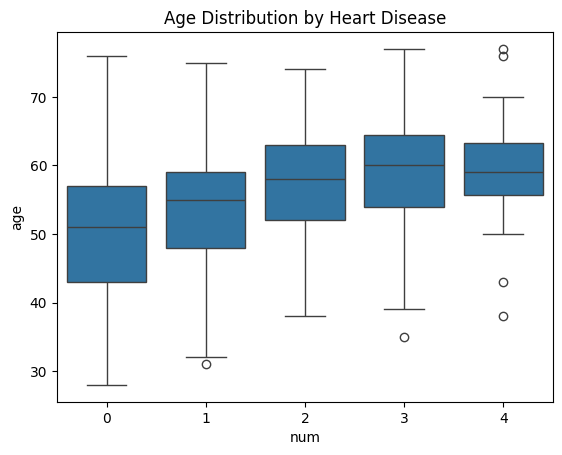

In [119]:
sns.boxplot(x='num',y='age', data=df)
plt.title("Age Distribution by Heart Disease")
plt.show()

## Insights

- The boxplot shows that the median age increases as the severity of heart disease increases.
- patients with higher disease levels(3,4) tend to be older compared to those with no disease(0).
- This suggest that age is important risk factor for heart disease severity

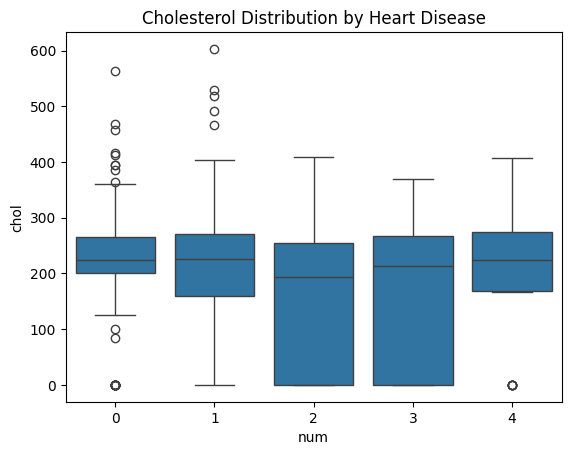

In [120]:
sns.boxplot(x='num',y='chol', data=df)
plt.title("Cholesterol Distribution by Heart Disease")
plt.show()

## Insights

- Cholesterol level shows significant overlap across diferent heart disease categories.
- Although some patients with heart disease have high cholesterol, the distributions are widely spread .
- Suggesting that cholesterol alone may not strongly distinguish disease severity.

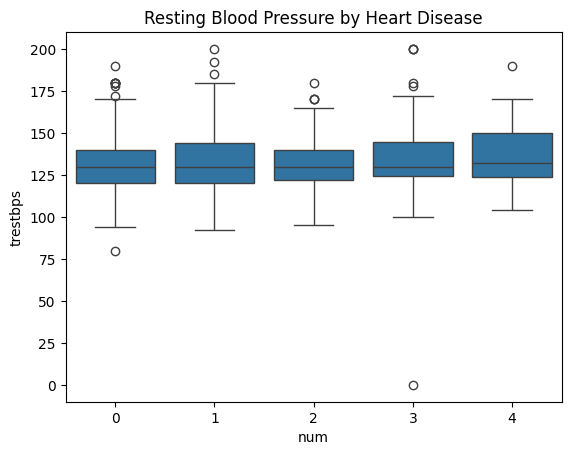

In [121]:
sns.boxplot(x='num',y='trestbps', data=df)
plt.title("Resting Blood Pressure by Heart Disease")
plt.show()

## Insights

- Cholesterol level shows significant overlap across diferent heart disease categories.
- Although some patients with heart disease have high cholesterol, the distributions are widely spread .
- Suggesting that cholesterol alone may not strongly distinguish disease severity.

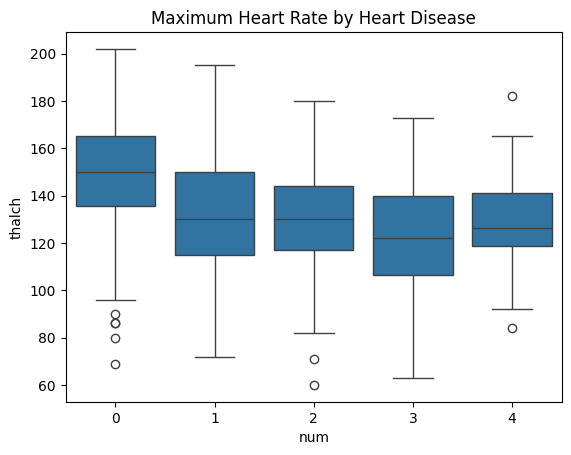

In [122]:
sns.boxplot(x='num',y='thalch', data=df)
plt.title("Maximum Heart Rate by Heart Disease")
plt.show()

## Insights

- Heart disease group often has lower median max heart rate.
- strong predictive feature

## SUMMARY

**From the Boxplot analysis** age, resting blood pressure , cholesterol, maximum heart rate show noticeable differences between patients with and without heart disease.

## Count plot of categorical columns

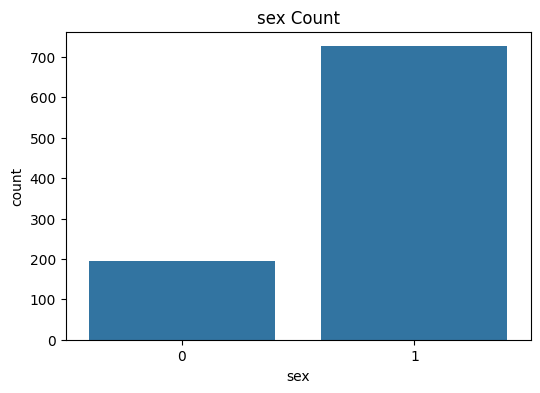

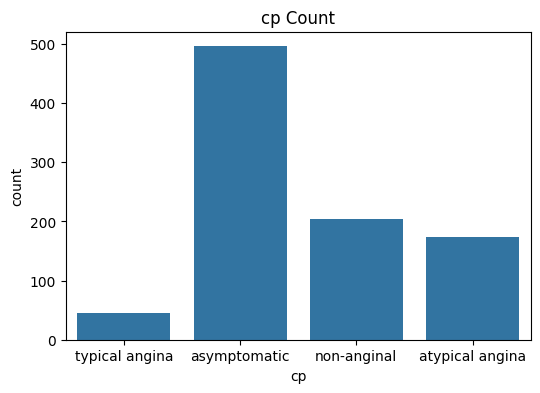

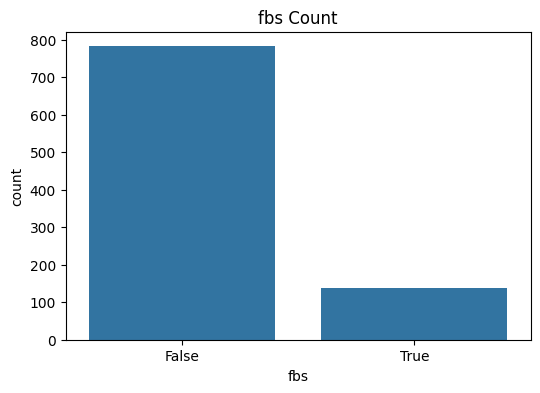

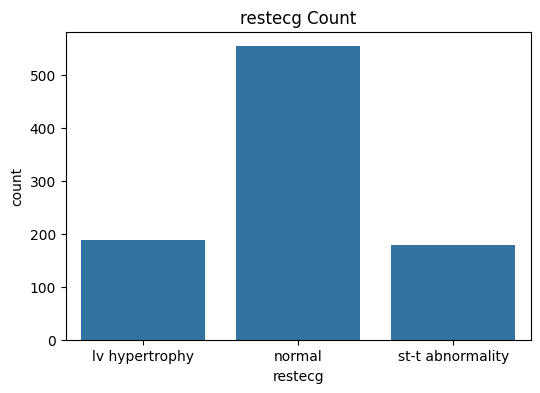

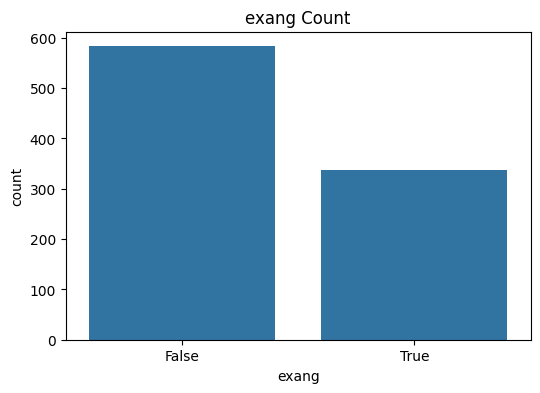

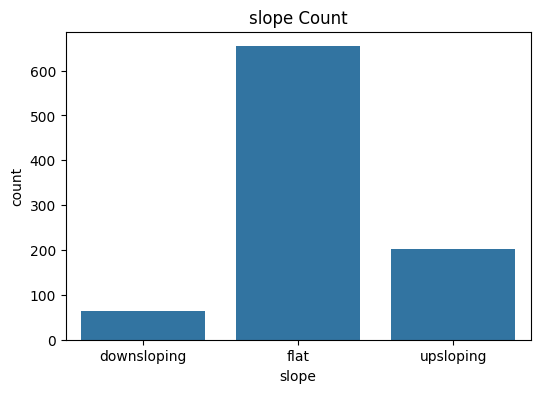

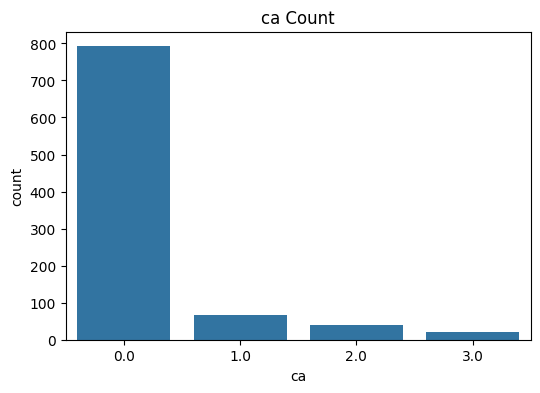

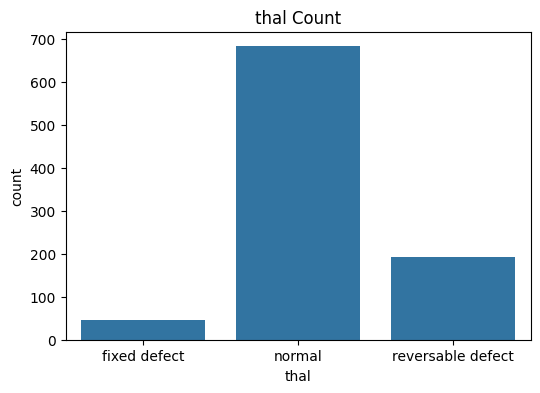

In [123]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Count")
    plt.show()


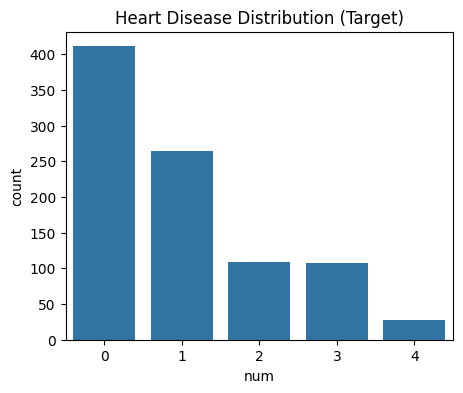

In [124]:
plt.figure(figsize=(5,4))
sns.countplot(x='num', data=df)
plt.title("Heart Disease Distribution (Target)")
plt.show()


## Correlation Heatmap for Numerical Cloumns

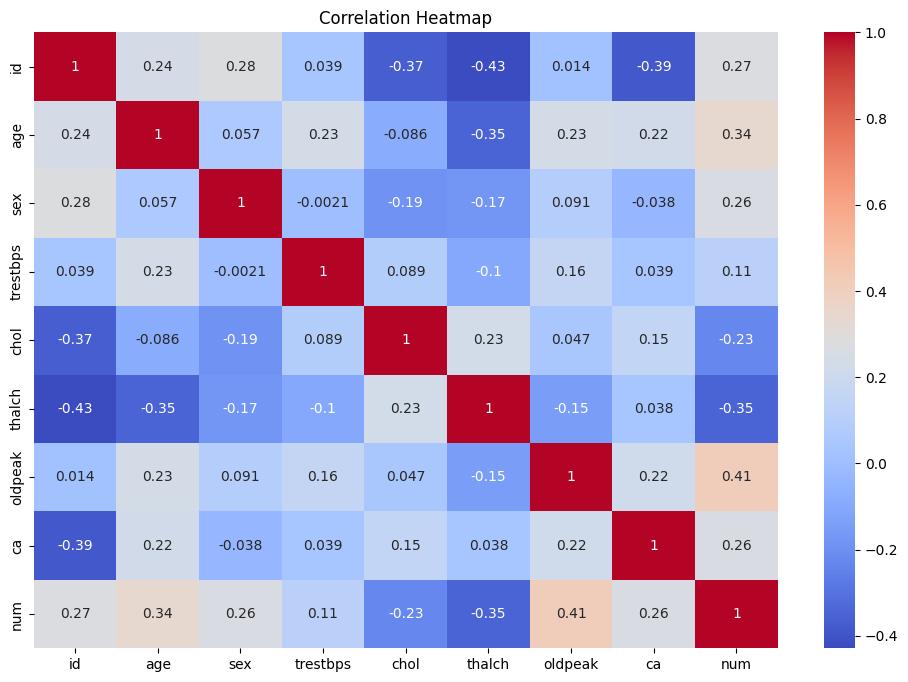

In [125]:
df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Insights

1.  `Strong Correlations with Target(num)`:
     
     - oldpeak --->  0.41
     - thalch --->  -0.35
     - age    ---->  0.34

2. `Positive Correlations (Higher ---> Higher Risk)`:

    - Oldpeak  (more ST depression) ---> higher chances of heart disease 
    - age (Older age) ---->  higher chances of heart disease 

3. `Negative Correlations (Higher ---> Lower Risk )`:

    - thalch (Higher max heart rate) --->  lower chances of heart disease 
    

4. `Weak Correlations`:
      
    - chol,ca,trestbps,restbps ----> weak correlations


### Encode categorical columns

In [126]:
df = pd.get_dummies(df,columns=['cp','restecg','slope','thal'] , drop_first=True)

In [127]:
df['exang'] = df['exang'].map({'Yes':1,'No':0})

## Convert to Binary Classification
- 0 ----> No Disease
- 1 ----> Disease(moderate to severe 1,2,3,4)

In [144]:
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)


In [ ]:
df = df.drop("id", axis=1)   # it got importance of 0.41 and model learns based on order so drop it


In [156]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,True,150.0,NaN,2.3,0.0,0,False,False,True,False,False,False,False,False,False
1,67,1,160.0,286.0,False,108.0,NaN,1.5,3.0,1,False,False,False,False,False,True,False,True,False
2,67,1,120.0,229.0,False,129.0,NaN,2.6,2.0,1,False,False,False,False,False,True,False,False,True
3,37,1,130.0,250.0,False,187.0,NaN,3.5,0.0,0,False,True,False,True,False,False,False,True,False
4,41,0,130.0,204.0,False,172.0,NaN,1.4,0.0,0,True,False,False,False,False,False,True,True,False


In [157]:
df.dtypes

age                           int64
sex                           int64
trestbps                    float64
chol                        float64
fbs                          object
thalch                      float64
exang                       float64
oldpeak                     float64
ca                          float64
num                           int64
cp_atypical angina             bool
cp_non-anginal                 bool
cp_typical angina              bool
restecg_normal                 bool
restecg_st-t abnormality       bool
slope_flat                     bool
slope_upsloping                bool
thal_normal                    bool
thal_reversable defect         bool
dtype: object

In [131]:
df.dtypes

id                            int64
age                           int64
sex                           int64
trestbps                    float64
chol                        float64
fbs                          object
thalch                      float64
exang                       float64
oldpeak                     float64
ca                          float64
num                           int64
cp_atypical angina             bool
cp_non-anginal                 bool
cp_typical angina              bool
restecg_normal                 bool
restecg_st-t abnormality       bool
slope_flat                     bool
slope_upsloping                bool
thal_normal                    bool
thal_reversable defect         bool
dtype: object

## Split Features and Target

In [159]:
X= df.drop(['num'],axis=1)
y=df['num']

## Train-Test Split

- 80% --> Training
- 20% --> Testing

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

## Train Decision Tree

In [179]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)



,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

## Make Predictions

In [180]:
y_pred = dt_model.predict(X_test)
print(y_pred)

[0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0
 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1
 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1]


## Evaluation Metrics

### Accuracy

In [181]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.7228260869565217


Total correct = 54 + 79 = 133
Total samples = 184

Accuracy = 133 / 184 = 72%

`What This Means--- `

54 healthy people correctly predicted
79 diseased patients correctly detected
21 false alarms
30 missed disease cases

The model detects heart disease reasonably well but still misses some positive cases.

### Confusion Matrix

In [182]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[54 21]
 [30 79]]
              precision    recall  f1-score   support

           0       0.64      0.72      0.68        75
           1       0.79      0.72      0.76       109

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.73      0.72      0.72       184



Total correct = 54 + 79 = 133
Total samples = 184

Accuracy = 133 / 184 = 72%
---
`What This Means `

- 54 healthy people correctly predicted
- 79 diseased patients correctly detected
- 21 false alarms
- 30 missed disease cases

The model detects heart disease reasonably well but still misses some positive cases.

## Feature Importance

In [165]:

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)


Feature Importance:
                      Feature  Importance
3                       chol    0.167262
9         cp_atypical angina    0.149842
0                        age    0.124601
5                     thalch    0.122103
10            cp_non-anginal    0.096738
7                    oldpeak    0.082216
2                   trestbps    0.081796
1                        sex    0.050115
17    thal_reversable defect    0.026892
12            restecg_normal    0.025265
8                         ca    0.023266
4                        fbs    0.021908
11         cp_typical angina    0.012927
15           slope_upsloping    0.005505
13  restecg_st-t abnormality    0.004315
16               thal_normal    0.004032
14                slope_flat    0.001217
6                      exang    0.000000


*The model relies mainly on cholesterol, chest pain, and age for prediction.*


### ROC Curve

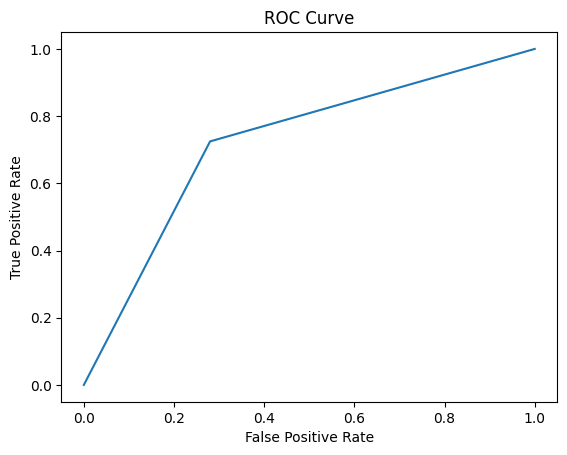

AUC Score: 0.7223853211009175


In [166]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = dt_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC Score:", auc_score)


### Final Insights & Conclusion

- The Decision Tree model achieved an accuracy of 72%, demonstrating acceptable performance in predicting heart disease risk. 

- The most influential features were cholesterol levels, chest pain type, age, maximum heart rate, and ST depression.

- Removing the ID column reduced artificial performance inflation and resulted in a more realistic and reliable model. 

- Although the model performs reasonably well, further improvement could be achieved using ensemble methods such as Random Forest or hyperparameter tuning.

Overall, **the project successfully demonstrates the complete machine learning workflow**, including data preprocessing, feature encoding, model training, evaluation, and interpretation.